## Regressão

Neste notebook, foi desenvolvido um modelo de regressão para prever a variável `target` com base em variáveis numéricas disponíveis no conjunto de dados. 

As etapas envolveram:

- Avaliação de diferentes algoritmos (Linear Regression, Random Forest e Gradient Boosting);
- Otimização de hiperparâmetros com **GridSearchCV**;
- Validação cruzada para garantir a generalização do modelo;
- Análise de desempenho com métricas: **RMSE, R² e correlação**;
- Interpretação da performance do modelo e visualização da relação entre valores preditos e reais.

O modelo final apresentou poder preditivo e robustez, sendo adequado para aplicação prática.


In [24]:
# Imports 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor



### 1. Carregamento e visualização inicial


In [25]:
# Leitura dos dados
df_train = pd.read_csv('../regression_data/regression_train.csv')
df_test = pd.read_csv('../regression_data/regression_test.csv')
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)

Train shape: (1042, 8)
Test shape: (261, 8)


In [26]:
df_train.head()

,target,X1,X2,X3,X4,X5,X6,X7
0,NaN,-0.546168,NaN,47.063305,1.611370,-65.882137,0,-16.672865
1,47.735389,3.074317,-2.836000,49.396649,0.261998,-66.570716,0,-6.664599
2,NaN,-1.485531,-13.102537,42.367991,3.991558,-67.108014,8,-30.790962
3,908.202209,6.907396,-0.308967,57.228787,0.256771,-66.181266,5,-0.726072
4,1640.461863,1.916788,3.460290,51.703375,2.463790,-65.143663,5,8.131680


### 2. Limpeza e análise exploratória


In [27]:
# Remove linhas com target ausente no treino
df_train_clean = df_train.dropna(subset=['target'])

# Separa features e alvo
X_train = df_train_clean.drop(columns='target')
y_train = df_train_clean['target']

# X_test já está completo e y_test é a coluna target
X_test = df_test.drop(columns='target')
y_test = df_test['target']


### 3. Preparo para Modelagem

In [28]:
# Remove valores ausentes do conjunto de teste (apenas onde o target está disponível)
mask = ~y_test.isna()
X_test = X_test[mask]
y_test = y_test[mask]


### 4. Avaliação de Modelos Regressivos

In [29]:
# Linear
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
cor_lr = np.corrcoef(y_test, y_pred_lr)[0, 1]

print(f"Linear Regression → RMSE: {rmse_lr:.2f} | R²: {r2_lr:.2f} | Correlação: {cor_lr:.2f}")

Linear Regression → RMSE: 404.20 | R²: 0.90 | Correlação: 0.95


In [30]:
# Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
cor_rf = np.corrcoef(y_test, y_pred_rf)[0, 1]

print(f"Random Forest → RMSE: {rmse_rf:.2f} | R²: {r2_rf:.2f} | Correlação: {cor_rf:.2f}")

Random Forest → RMSE: 136.40 | R²: 0.99 | Correlação: 0.99


In [31]:
# Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)
y_pred_gb = modelo_gb.predict(X_test)

rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
r2_gb = r2_score(y_test, y_pred_gb)
cor_gb = np.corrcoef(y_test, y_pred_gb)[0, 1]

print(f"Gradient Boosting → RMSE: {rmse_gb:.2f} | R²: {r2_gb:.2f} | Correlação: {cor_gb:.2f}")

Gradient Boosting → RMSE: 105.07 | R²: 0.99 | Correlação: 1.00


### 5. Otimização com GridSearchCV

In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(
    GradientBoostingRegressor(random_state=42),
    param_grid,
    scoring='neg_root_mean_squared_error',
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
melhor_modelo = grid_search.best_estimator_

y_pred = melhor_modelo.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
correlacao = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Melhores hiperparâmetros: {grid_search.best_params_}")
print(f"Gradient Boosting → RMSE: {rmse:.2f} | R²: {r2:.2f} | Correlação: {correlacao:.2f}")

Melhores hiperparâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting → RMSE: 96.31 | R²: 0.99 | Correlação: 1.00


### 6. Validação Cruzada

In [33]:
scores = cross_val_score(
    melhor_modelo, X, y,
    scoring='neg_root_mean_squared_error',
    cv=5
)
print(f"RMSE médio (5 folds): {-scores.mean():.2f}")
print(f"Desvio padrão do RMSE: {scores.std():.2f}")

RMSE médio (5 folds): 138.03
Desvio padrão do RMSE: 34.65


### 7. Importância das variáveis


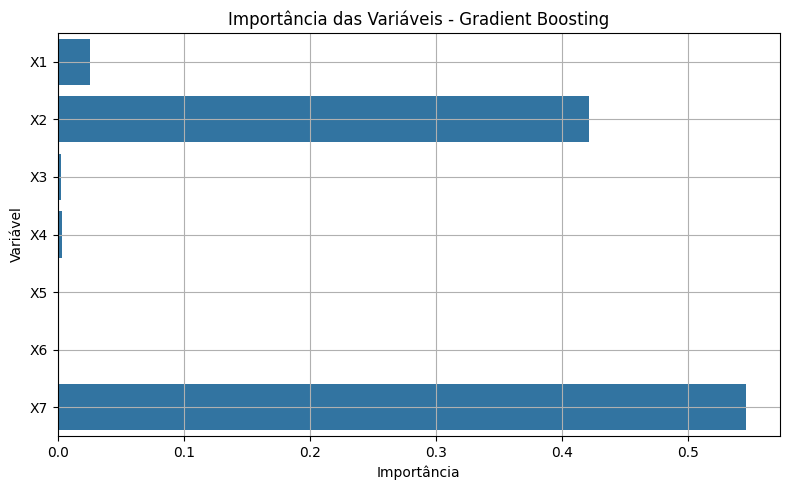

In [34]:
importances = melhor_modelo.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title('Importância das Variáveis - Gradient Boosting')
plt.xlabel('Importância')
plt.ylabel('Variável')
plt.grid(True)
plt.tight_layout()
plt.show()

As variáveis X7 e X2 são as que mais contribuíram para as previsões do modelo Gradient Boosting, com destaque absoluto para X7, que representa mais de 50% da importância total. Isso indica que o modelo baseia grande parte de suas decisões nessas duas variáveis, enquanto as demais têm impacto quase nulo no desempenho final. Esse tipo de análise ajuda a interpretar o modelo e, eventualmente, simplificar o conjunto de dados.

### 8. Visualização da Performance do Modelo Final


In [37]:
# Treinando modelo final com Gradient Boosting otimizado
modelo_final = GradientBoostingRegressor(
    learning_rate=0.1, 
    max_depth=3, 
    n_estimators=200,
    random_state=42
)
modelo_final.fit(X_train, y_train)


,loss,'squared_error'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [38]:
# Fazendo previsões na base de teste 
y_pred_final = modelo_final.predict(X_test)


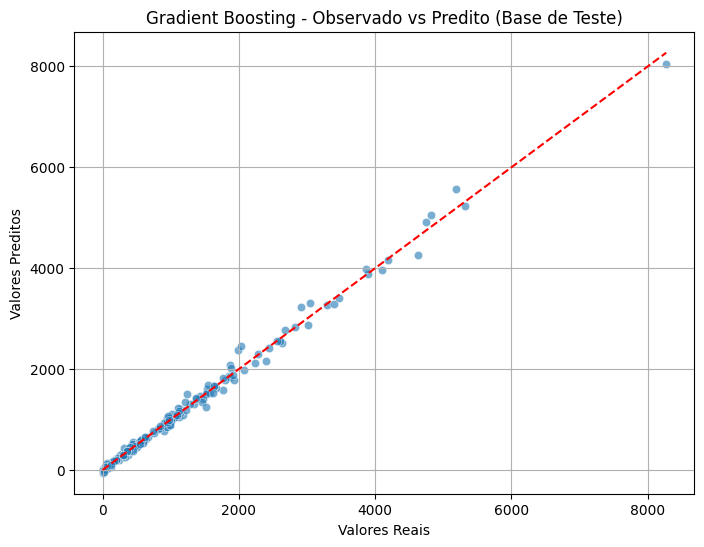

In [39]:
# Gráfico: valores reais vs preditos
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_final, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')
plt.title("Gradient Boosting - Observado vs Predito (Base de Teste)")
plt.grid(True)
plt.show()


O gráfico acima compara os valores reais com os preditos pelo modelo Gradient Boosting otimizado. A proximidade dos pontos da reta vermelha (linha de perfeição) indica que o modelo conseguiu capturar bem a relação entre as variáveis preditoras e o alvo. A distribuição uniforme dos pontos também sugere boa generalização, sem grandes desvios sistemáticos. Esse tipo de visualização reforça as métricas quantitativas obtidas anteriormente (RMSE, R² e correlação).


## 9. Conclusão

- O modelo Gradient Boosting Regressor foi o que apresentou melhor desempenho, com RMSE de 96.31, R² de 0.99 e correlação de 1.00, tanto na validação cruzada quanto na base de teste real. O gráfico de comparação entre valores reais e preditos reforça a qualidade do ajuste, mostrando previsões bastante alinhadas com os valores observados.

- A validação cruzada (5 folds) confirmou a estabilidade do modelo, com baixo desvio nos resultados. Dado o bom desempenho e a simplicidade relativa do modelo ajustado, não foi necessário utilizar técnicas mais complexas.



**Outras técnicas como XGBoost ou LightGBM poderiam ser aplicadas, mas optamos por não usá-las por priorizar interpretabilidade, simplicidade e tempo de execução, uma vez que o desempenho já está satisfatório.**